# Ref Book: 

Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits: A practical guide to implementing supervised and unsupervised machine learning algorithms in Python

Tarek Amr - 2020

## Chapter 2 - Iris Dataset (Scikit-learn)
 - Classification problem
 - Three species are covered: Setosa, Versicolor, and Virginica. 
 - FEATURES: length and the widths of the sepal and petal of each plant 
 - TARGET: Setosa, a Versicolor, or a Virginica 
 
Our task is to be able to identify the species of a plant given its sepal and petal dimensions.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Instance the Iris dataset into iris variable
iris = load_iris()

In [3]:
# Using dir , we can see what methods and attributes the dataset provides:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## This description holds some useful information:
- The data is composed of 150 rows (or 150 samples)... small dataset
- We have to think on how to deal with this fact when evaluating our model.
- Some classification algorithms can only deal with two class labels; we call them binary classifiers. 
- But the decision tree algorithm can deal with more than two classes, so we have no problems this time.
- The data is balanced; there are 50 samples for each class. 
- There is four numeric features: sepal length , sepal width , petal length , and petal width
- There are no missing attribute values.
- The petal dimensions correlate with the class values more than the sepal dimensions... Understanding the data is useful, but the problem here is that this correlation is calculated for the entire dataset. Ideally, we will only calculate it for our training data. Anyway, let's IGNORE this information for now and just use it for a sanity check later on.

In [5]:
# Nome das classes:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Opening the Data into a DataFrame:


In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# We can see that the TARGET column has de class IDs
 - For more clarity, we can also create a new column called target_names , where we can map our numerical target values to the class names:


In [7]:
df['target_names'] = df['target'].apply(lambda y: iris.target_names[y])

# A random sample from the dataframe: 6 rows, and we use random_state with the same 
# seed to produce equal results, everytime 
df.sample(n=6, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


## Splitting the data
Let's split the DataFrame into 2: 
- 70% of the records goes into the training set
- 30% goes into testing set
- choice of 70/30 is arbitrary

We will use the `train_test_split()` 

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)

In [9]:
# checking how many rows in the test and train DataFrames
print('Nº Rows in TEST:  ', df_test.shape[0])
print('Nº Rows in TRAIN:', df_train.shape[0])

Nº Rows in TEST:   45
Nº Rows in TRAIN: 105


The feature_names method in iris contains a list of the corresponding column names to our features. 
## Creating our `x` and `y` sets, as follows:


In [10]:
x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

In [11]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
9,4.9,3.1,1.5,0.1
26,5.0,3.4,1.6,0.4
75,6.6,3.0,4.4,1.4
66,5.6,3.0,4.5,1.5
62,6.0,2.2,4.0,1.0


In [12]:
y_train

9      0
26     0
75     1
66     1
62     1
      ..
34     0
100    2
118    2
37     0
40     0
Name: target, Length: 105, dtype: int64

## Training the model DecisionTreeClassifier and using it for prediction

To get a feel for how everything works, we will train our algorithm using its default
configuration for now. 


In [13]:
from sklearn.tree import DecisionTreeClassifier

# It is common to call the classifier instance clf
clf = DecisionTreeClassifier()

In [14]:
# training the model using fit()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
# calling the fit() method, the clf instance is trained and ready to be used for
#predictions, so we call the predict() method on x_test

y_test_predicted = clf.predict(x_test)

## Evaluating our predictions
As we have `y_test_predict` , all we need now is to compare it to `y_test` to check how
good our predictions are. 

- Metrics for evaluating a classifier: precision , recall , and accuracy . 

The Iris dataset is a balanced dataset; it has the same number of instances for each class. Therefore, it is apt to use the accuracy metric here.

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_predicted)
accuracy

1.0

In [17]:
from sklearn.metrics import r2_score

# Erro quadrático RSS
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())

rss = calc_rss(y_test, y_test_predicted)
print(rss)

# ajuste R² 
r2 = r2_score(y_test, y_test_predicted)
print(r2)

0.0
1.0


## Which features were more important?
We may now ask ourselves, Which features did the model find more useful in deciding the iris species? Luckily, DecisionTreeClassifier has a method called `feature_importances_` , which is computed after the classifier is fitted and scores how important each feature is to the model's decision. In the following code snippet, we will create a DataFrames where we will put the features' names and their importance together and then sort the features by their importance:

In [18]:
df_importances = pd.DataFrame(
    {
    'feature_names': iris.feature_names,  
     'feature_importances': clf.feature_importances_
    }
).sort_values('feature_importances', ascending=False).set_index('feature_names')

df_importances

,feature_importances
feature_names,
petal length (cm),0.553657
petal width (cm),0.413010
sepal length (cm),0.019048
sepal width (cm),0.014286


## Displaying the internal tree decisions
We can also print the internal structure of the learned tree using the following code
snippet:

In [19]:
from sklearn.tree import export_text

print(export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1))

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.8
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- petal width (cm) <= 1.7
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.7
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |--- sepal length (cm) <= 6.9
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.9
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.8
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal width (cm) <= 3.0
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.0
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.9
|   |   |   |--- class: 2



If you print the complete dataset description, you will notice that toward the end, it says
the following:

One class is linearly separable from the other two; the latter are NOT linearly separable
from each other.

This means that one class is easier to separate from the other two, while the other two are
harder to separate from each other. Now, look at the internal tree's structure. You may
notice that in the first step, it decided that anything with a petal width below or equal t
0.8 belongs to class 0 ( Setosa ). Then, for petal widths above 0.8 , the tree kept on
branching, trying to differentiate between classes 1 and 2 ( Versicolor and Virginica ).
Generally, the harder it is to separate classes, the deeper the branching goes.

# Checking overfitting by comparing:
the classifier's accuracy on the test set to its accuracy on the training set. Having a much
higher score for your training set compared to the test set is a sign of
overfitting.

https://machinelearningmastery.com/overfitting-machine-learning-models/

We care about overfitting because it is a common cause for “poor generalization” of the model as measured by high “generalization error.” That is error made by the model when making predictions on new data.

This means, if our model has poor performance, maybe it is because it has overfit.

In [20]:
# Comparing test and train accuracy
accuracy_test = accuracy_score(y_test, y_test_predicted)

y_train_predicted = clf.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_predicted)
print('With no MAX_DEPTH() defined, our comparison of TEST and TRAIN is:\n')
print(accuracy_test)
print(accuracy_train)

With no MAX_DEPTH() defined, our comparison of TEST and TRAIN is:

1.0
1.0


# What to do now to get a more reliable score?

let's run the whole process of data splitting, training, and predicting,
more than once, and get the distribution of the different accuracy scores we get each time.

Generating different train and test splits is called cross-validation. This helps us have a
more reliable estimation of our model's accuracy. What we did in the previous section is
one of many cross-validation strategies called repeated random sub-sampling validation, or
Monte Carlo cross-validation.

Average Score: 0.949 [5th percentile: 0.911 & 95th percentile:0.978]


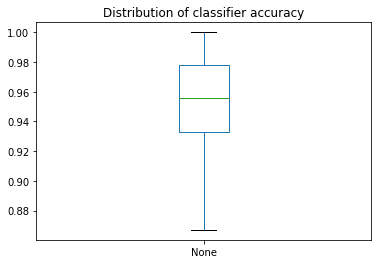

In [21]:
# A list to store the score from each iteration
accuracy_scores = []

for _ in range(100):
    # At each iteration we freshly split our data
    df_train, df_test = train_test_split(df, test_size=0.3)
    x_train = df_train[iris.feature_names]
    x_test = df_test[iris.feature_names]
    y_train = df_train['target']
    y_test = df_test['target']
    # We then create a new classifier
    clf = DecisionTreeClassifier()
    # And use it for training and prediction
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    # Finally, we append the score to our list
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))
    
# Better convert accuracy_scores from a list into a series
# Pandas series provides statistical methods to use later
accuracy_scores = pd.Series(accuracy_scores)

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box')
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
    accuracy_scores.mean(),
    accuracy_scores.quantile(.05),
    accuracy_scores.quantile(.95)))

# ShuffleSplit
scikit-learn's `ShuffleSplit` module provides us with the functionality to perform [Monte
Carlo cross-validation](https://towardsdatascience.com/cross-validation-k-fold-vs-monte-carlo-e54df2fc179b). Rather than us splitting the data ourselves, ShuffleSplit gives us
lists of indices to use for splitting our data. In the following code, we are going to use the
DataFrame's loc() method and the indices we get from ShuffleSplit to randomly split
the dataset into 100 training and test pairs:

In [22]:
from sklearn.model_selection import ShuffleSplit

accuracy_scores = []

# instance shuffle split
rs = ShuffleSplit(n_splits = 100, test_size = 0.3)

# Now we jave 100 pairs os indices
for train_index, test_index in rs.split(df):
    x_train = df.loc[train_index, iris.feature_names]
    x_test = df.loc[test_index, iris.feature_names]
    y_train = df.loc[train_index, 'target']
    y_test = df.loc[test_index, 'target']
    
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)
    
#accuracy_scores


Alternatively, we can simplify the preceding code even further by using scikit-
learn's `cross_validate` functionality. This time, we are not event splitting the data into
training and test sets ourselves. We will give cross_validate the x and y values for the
entire set, and then give it our ShuffleSplit instance for it to use internally to split the
data. We also give it the classifier and specify what kind of scoring metric to use. When
done, it will give us back a list with the calculated test set scores:

In [23]:
from sklearn.model_selection import cross_validate

dlf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']

# application of cross validation method passing the estimator (clf), X, y, cross valid generator (cv) 
# and We also give it the classifier and specify what kind of scoring metric to use. 
cross_validation_results = cross_validate(clf, x, y, cv=rs, scoring='accuracy')


In [24]:
cross_validation_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [25]:
accuracy_scores = pd.Series(cross_validation_results['test_score'])
accuracy_scores

0     0.933333
1     0.955556
2     0.955556
3     0.955556
4     0.955556
        ...   
95    0.977778
96    0.933333
97    0.911111
98    0.888889
99    0.977778
Length: 100, dtype: float64

Average Score: 0.946 [5th percentile: 0.889 & 95th percentile:0.978]


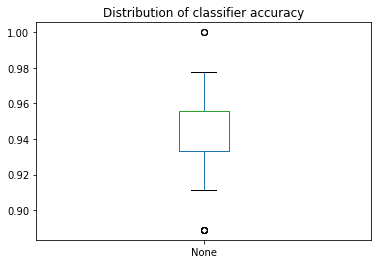

In [26]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box')
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
    accuracy_scores.mean(),
    accuracy_scores.quantile(.05),
    accuracy_scores.quantile(.95)))

## Cross-validation is recommended when dealing with a small dataset
since a group of
accuracy scores will give us a better understanding of the classifier's performance
compared to a single score calculated after a single trial.

# Tuning the hyperparameters for higher accuracy

Now that we have learned how to evaluate the model's accuracy more reliably using the
ShuffleSplit cross-validation method, it is time to test our earlier hypothesis: 
#### would a smaller tree be more accurate?

Let's follow the steps:
1. Split the data into training and test sets.

In [27]:
# split train and test data, using test size os 0.25 this time
df_train, df_test = train_test_split(df, test_size=0.25)

x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

2. Keep the test side to one side now.

3. Limit the tree's growth using different values of max_depth .

4. For each max_depth setting, we will use the ShuffleSplit cross-validation method on the training set to get an estimation of the classifier's accuracy.

In [28]:
# check the depth of the tree
clf.get_depth()

4

In [29]:
for max_depth in range(1, 7):
    # We initialize a new classifier each iteration with different max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    # We also initialize our shuffle splitter
    rs = ShuffleSplit(n_splits=20, test_size=0.25)
    cv_results = cross_validate(clf, x_train, y_train, cv=rs, scoring='accuracy')
    accuracy_scores = pd.Series(cv_results['test_score'])
    
    print('@ max_depth = {}: accuracy_scores: {} ~ {}'.format(max_depth,accuracy_scores.quantile(.1).round(3),accuracy_scores.quantile(.9).round(3)))

@ max_depth = 1: accuracy_scores: 0.5 ~ 0.718
@ max_depth = 2: accuracy_scores: 0.886 ~ 0.968
@ max_depth = 3: accuracy_scores: 0.889 ~ 1.0
@ max_depth = 4: accuracy_scores: 0.857 ~ 0.964
@ max_depth = 5: accuracy_scores: 0.889 ~ 1.0
@ max_depth = 6: accuracy_scores: 0.893 ~ 0.968


### We can see that the `max_depth` = 3 = 5 = 6
- accuracy_scores: 0.925 ~ 1.0
### So we can use the minimun Max_depth = 3 in our model!

5. Once we decide which value to use for max_depth , we will train the algorithm one last time on the entire training set and predict on the test set.

In [30]:
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

## Visualizing the tree's decision boundaries
In addition to printing the classifier's decision and descriptive statistics about its accuracy.

As we already know by now,
decision trees pick one feature at a time and try to split the data accordingly. Nevertheless,
it is important to be able to visualize those decisions as well.

When the tree made a decision to split the data around a petal width of 0.8 , you can think
of it as drawing a horizontal line in the right-hand side graph at the value of 0.8 .

Then,
with every later split, the tree splits the space further using combinations of horizontal and
vertical lines. By knowing this, you should not expect the algorithm to use curves or 45-
degree lines to separate the classes.

In [31]:
import matplotlib.pyplot as plt

# Created by Richard Johansson of the University of Gothenburg
# The docstring and comments were added by me :)

def plot_decision_boundary(clf, x, y):
    """Function that receives the classification model, the features (X) 
    and the target (y).
    ---> The function returns a counter plot with the Tree's Decision Boundaries 
    (as vertical and horizontal lines, showing the delimitation of the model)."""
    feature_names = x.columns
    x, y = x.values, y.values
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    step = 0.02
    
    # Returning the coordinate matrices from coordinate vectors
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    # Translation of slice objects to concatenation along the second axis
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Putting at the same shape as 'xx' coordinate matrice
    Z = Z.reshape(xx.shape)
    
    # Plotting the Tree's Decision Boundaries
    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    plt.title("Tree's Decision Boundaries")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

- As we've seen before, the petal lenght and width are the most important features;
- The others, doens't really impact the model.
- So, we will use only two features: 
   - `petal lenght`
   - `petal width`

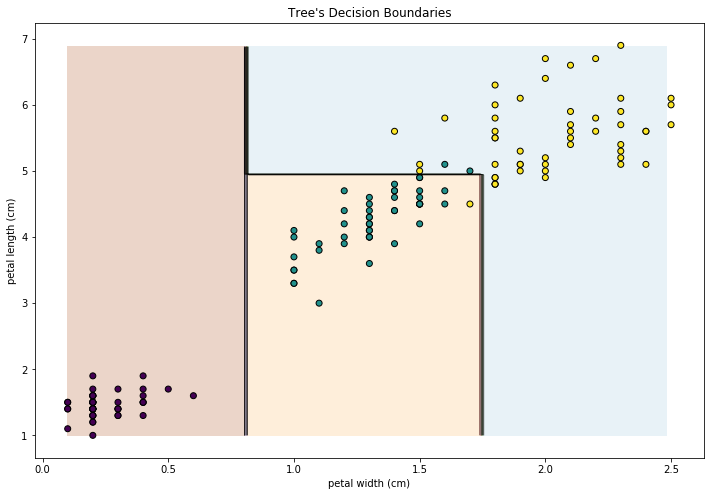

In [32]:
# Selecting the features (Series)
x = df[['petal width (cm)', 'petal length (cm)']]

# Selecting the target (Series)
y = df['target']

# Making the model with pre-analysed max_depth = 3
max_depth_opt = 3
clf = DecisionTreeClassifier(max_depth=max_depth_opt)

# Training the model with x and y, without spliting the data
clf.fit(x, y)

# Applying the function that plots the Tree's Decision Boundaries
plot_decision_boundary(clf, x, y)

# Feature engineering

In [34]:
df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

In [36]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,petal length x width (cm),sepal length x width (cm)
0,5.1,3.5,1.4,0.2,0,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,0,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,0,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,0,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,0,setosa,0.28,18.00
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,11.96,20.10
146,6.3,2.5,5.0,1.9,2,virginica,9.50,15.75
147,6.5,3.0,5.2,2.0,2,virginica,10.40,19.50
148,6.2,3.4,5.4,2.3,2,virginica,12.42,21.08


The following code will plot the classes versus the newly derived features:

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


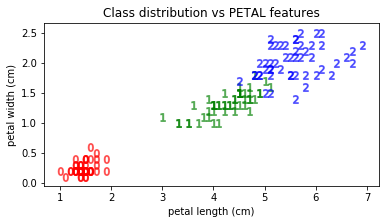

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3));

h_label = 'petal length (cm)'
v_label = 'petal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[df['target'] == c].plot(title='Class distribution vs PETAL features',
                               kind='scatter', x=h_label, y=v_label, 
                               color=['r', 'g', 'b'][c], # Each class different color
                               marker=f'${c}$', # Use class id as marker
                               s=64, alpha=0.5, ax=ax)

    

fig.show()

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


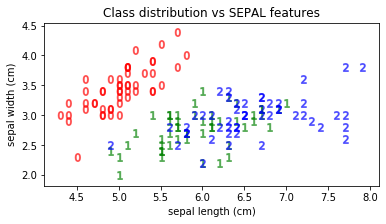

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3));

h_label = 'sepal length (cm)'
v_label = 'sepal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[df['target'] == c].plot(title='Class distribution vs SEPAL features',
                               kind='scatter', x=h_label, y=v_label, 
                               color=['r', 'g', 'b'][c], # Each class different color
                               marker=f'${c}$', # Use class id as marker
                               s=64, alpha=0.5, ax=ax)
    
fig.show()

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


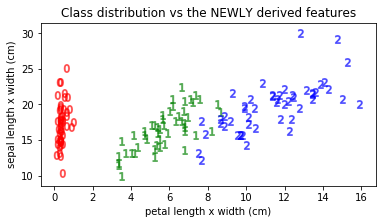

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3));

h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[df['target'] == c].plot(title='Class distribution vs the NEWLY derived features',
                               kind='scatter', x=h_label, y=v_label, 
                               color=['r', 'g', 'b'][c], # Each class different color
                               marker=f'${c}$', # Use class id as marker
                               s=64, alpha=0.5, ax=ax)

fig.show()

# This new projection looks better! 
- The Data is better vertically separable;
- So, let's train two classifiers—one on theoriginal features and one on the newly derived features
- Let's compare their accuracies. 



In [95]:
# Both features for future comparison 
features_orig = iris.feature_names
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']

# Creating accuracy scores lists of both 
accuracy_scores_orig = []
accuracy_scores_new = []

In [96]:
# Iterating in 500 random splitting, training and storing the scores in each list
for c in range(1, 501):
    
    df_train, df_test = train_test_split(df, test_size=0.3)
    
    x_train_orig = df_train[features_orig]
    x_test_orig = df_test[features_orig]
    x_train_new = df_train[features_new]
    x_test_new = df_test[features_new]
    
    y_train = df_train['target']
    y_test = df_test['target']
    
    # Setting the optimal max_depth as 3
    clf_orig = DecisionTreeClassifier(max_depth=3)
    clf_new = DecisionTreeClassifier(max_depth=3)
    
    # Training both models
    clf_orig.fit(x_train_orig, y_train)
    clf_new.fit(x_train_new, y_train)
    
    # predicting the results for both models, using the x_test variable
    y_pred_orig = clf_orig.predict(x_test_orig)
    y_pred_new = clf_new.predict(x_test_new)
    
    # Comparing the results using the predicted y and the test y, also appending the the list:
    accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig),3))
    accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new),3))

In [97]:
# Transforming the lists into Series
accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

# Box plots to compare the accuracies of the two classifiers:

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


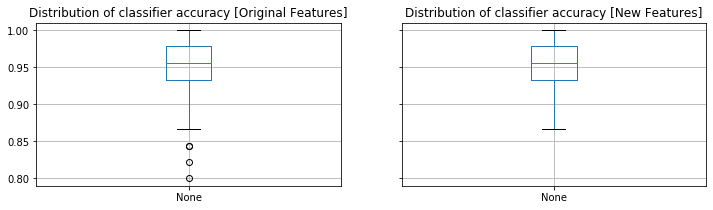

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True);

accuracy_scores_orig.plot(title='Distribution of classifier accuracy [Original Features]',kind='box',grid=True,ax=axs[0])

accuracy_scores_new.plot(title='Distribution of classifier accuracy [New Features]',kind='box',grid=True,ax=axs[1])

fig.show()